#**GATHERING DATASET**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("Wine_dataset.csv")

In [20]:
df.head()

,Age,Alcohol_percent,Price
0,102,9,875
1,119,7,929
2,179,9,1792
3,111,9,980
4,150,9,1522


In [21]:
df.isnull().sum()

Age                0
Alcohol_percent    0
Price              0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              50 non-null     int64
 1   Alcohol_percent  50 non-null     int64
 2   Price            50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [23]:
df.describe()

,Age,Alcohol_percent,Price
count,50.000000,50.0000,50.000000
mean,141.900000,9.4400,1343.160000
std,28.074427,2.7491,405.459797
min,102.000000,5.0000,669.000000
25%,117.000000,7.0000,1029.750000
50%,137.000000,9.0000,1296.000000
75%,166.500000,11.7500,1660.500000
max,194.000000,15.0000,2238.000000


#1. How is Age of Wine and Alcohol % affecting Price?

In [24]:
df.corr()

,Age,Alcohol_percent,Price
Age,1.000000,-0.211752,0.762153
Alcohol_percent,-0.211752,1.000000,0.382082
Price,0.762153,0.382082,1.000000


OBSERAVTION :- 
* In Age and Price has high positive correlation i.e, 76.21%.
    * As the Age increase, price also increases.

    
* In Alcohol and Price is negatively correlated i.e, 21.17%
    * As Alcohol% increase, price decreases. 

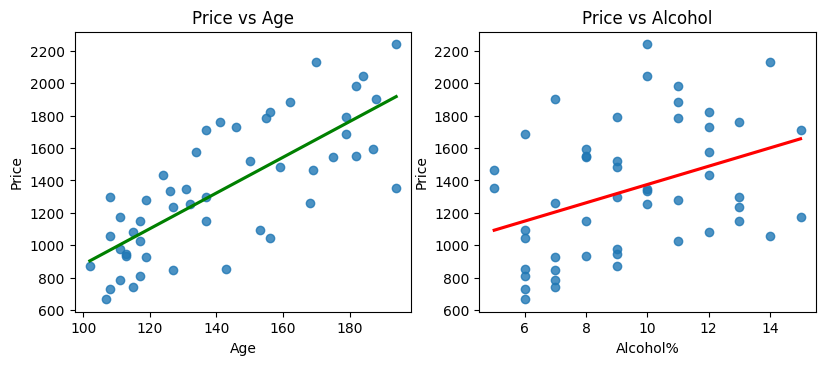

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(2,4,1)
sns.regplot(data = df, x = "Age", y = "Price", ci = None, line_kws={"color": "green"})
plt.xlabel("Age")
plt.ylabel("Price")
plt.title("Price vs Age")

plt.subplot(2,4,2)
sns.regplot(data = df, x = "Alcohol_percent", y = "Price", ci = None, line_kws={"color": "red"})
plt.xlabel("Alcohol%")
plt.ylabel("Price")
plt.title("Price vs Alcohol")
plt.show()

OBSERVATION :-
* Age is linearly affecting the price as we can see in plot.
* Alcohol slope is approaching to zero. 

#2. Is the model useful?

In [26]:
X = df.drop("Price", axis = 1)
y = df.Price

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Using fit_transform to the train data.
X_train = scaler.fit_transform(X_train)

#"transform" only to avoid data leakage.
X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print("Score : ", reg.score(X_train,y_train))
print("Coeff: ", reg.coef_)
print("Intercept : ", reg.intercept_)
y_pred = reg.predict(X_test)

Score :  0.8840767072621936
Coeff:  [339.09280202 239.84766449]
Intercept :  1324.4864864864862


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("RMSE for test set : ", mean_squared_error(y_test, y_pred_test),'\n')
print("MSE for test set : ", mean_squared_error(y_test, y_pred_test, squared = False),'\n')
print("MAE for test set : ", mean_absolute_error(y_test, y_pred_test),'n')
print("R2 Score : ", r2_score(y_test, y_pred_test))

RMSE for test set :  24759.949211493848 

MSE for test set :  157.3529447182157 

MAE for test set :  119.35276360834838 n
R2 Score :  0.8692398280936495


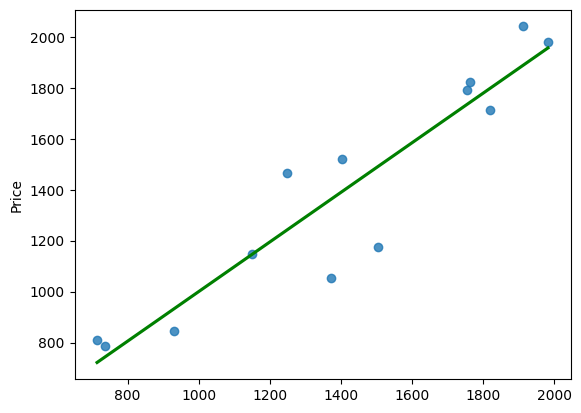

In [32]:
sns.regplot(x = y_pred, y = y_test, ci = None, line_kws={"color": "green"})
plt.show()

OBSERAVTION
* Yes, 